# Análise RFM

A análise RFM (Recency, Frequency, Monetary) é uma técnica de segmentação de clientes utilizada para identificar quais clientes são mais valiosos para uma empresa através da avaliação de três dimensões específicas: quão recentemente um cliente fez uma compra (Recency), com que frequência eles compram (Frequency) e quanto eles gastam (Monetary). 

Recency ajuda a entender a relevância atual do cliente, Frequency destaca a lealdade do cliente, e Monetary indica o valor financeiro do cliente para a empresa. 

Ao combinar estas dimensões, a análise RFM permite às empresas personalizar estratégias de comunicação, marketing e vendas para atender e engajar diferentes segmentos de clientes de maneira mais eficaz, focando em manter clientes rentáveis e potencializar o valor ao longo do tempo.

## Base de dados 

Fonte [Kaggle](https://www.kaggle.com/datasets/aslanahmedov/market-basket-analysis)

* BillNo: número de 6 dígitos atribuído a cada transação. Nominal.
* Itemname: Nome do produto. Nominal.
* Quantity: As quantidades de cada produto por transação. Numérico.
* Date: O dia e a hora em que cada transação foi gerada. Numérico.
* Price: Preço do produto. Numérico.
* CustomerID: número de 5 dígitos atribuído a cada cliente. Nominal.
* Country: Nome do país onde cada cliente reside. Nominal.

In [34]:
import pandas as pd
dados = pd.read_pickle('dados_analise.pkl')

In [35]:
dados

,billno,itemname,quantity,date,price,customerid,country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [36]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   billno      522064 non-null  object        
 1   itemname    520609 non-null  object        
 2   quantity    522064 non-null  int64         
 3   date        522064 non-null  datetime64[ns]
 4   price       522064 non-null  float64       
 5   customerid  388023 non-null  float64       
 6   country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [37]:
dados['total_item'] = dados.quantity*dados.price
dados

,billno,itemname,quantity,date,price,customerid,country,total_item
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [42]:
dados_agrupados = dados.groupby(by = ['customerid','date','billno']).agg(total_bill = ('total_item','sum')).reset_index()
dados_agrupados

,customerid,date,billno,total_bill
0,12346.0,2011-01-18 10:01:00,541431,77183.60
1,12347.0,2010-12-07 14:57:00,537626,711.79
2,12347.0,2011-01-26 14:30:00,542237,475.39
3,12347.0,2011-04-07 10:43:00,549222,636.25
4,12347.0,2011-06-09 13:01:00,556201,382.52
...,...,...,...,...
18187,18283.0,2011-11-30 12:59:00,579673,223.61
18188,18283.0,2011-12-06 12:02:00,580872,208.00
18189,18287.0,2011-05-22 10:39:00,554065,765.28
18190,18287.0,2011-10-12 10:23:00,570715,1001.32


## Cálculo da recência

In [43]:
last_date = dados_agrupados.date.max()
rec_table = dados_agrupados.groupby(["customerid"]).agg({"date": lambda x: ((last_date - x.max()).days)})
rec_table.columns = ["recency"]
rec_table = rec_table.reset_index()
rec_table.head()

,customerid,recency
0,12346.0,325
1,12347.0,1
2,12349.0,18
3,12350.0,309
4,12352.0,35


## Cálculo da frequência

In [44]:
freq_table = dados_agrupados.groupby(["customerid"])[["billno"]].count()
freq_table.columns = ["frequency"]
freq_table = freq_table.reset_index()
freq_table.head()

,customerid,frequency
0,12346.0,1
1,12347.0,7
2,12349.0,1
3,12350.0,1
4,12352.0,8


## Cálculo do valor monetário

In [46]:
monetary_table = dados_agrupados.groupby(["customerid"])[["total_bill"]].median()
monetary_table.columns = ["monetary"]
monetary_table = monetary_table.reset_index()
monetary_table.head()

,customerid,monetary
0,12346.0,77183.600
1,12347.0,584.910
2,12349.0,1757.550
3,12350.0,334.400
4,12352.0,281.375


Visto que a base de dados apresenta um ano de dados de itens comprados por diversos clientes, foi optado por determinar a mediana do valor da conta de cada cliente no lugar do total gasto.

A decisão foi tomada uma vez que podem haver compras de determinados clientes com altos valores que não necessariamente representam seu perfil de compra ao longo daquele ano.

## Montagem da tabela com todos os clientes

In [54]:
rfm_data = pd.merge(rec_table,freq_table,on = 'customerid',how = 'left')
rfm_data = pd.merge(rfm_data,monetary_table,on = 'customerid',how = 'left')
rfm_data.head()

,customerid,recency,frequency,monetary
0,12346.0,325,1,77183.600
1,12347.0,1,7,584.910
2,12349.0,18,1,1757.550
3,12350.0,309,1,334.400
4,12352.0,35,8,281.375


In [55]:
rfm_data.describe()

,customerid,recency,frequency,monetary
count,4297.000000,4297.00000,4297.000000,4297.000000
mean,15315.691180,91.61252,4.233651,395.045629
std,1716.241594,100.14893,7.108585,1787.323665
min,12346.000000,0.00000,1.000000,0.000000
25%,13831.000000,17.00000,1.000000,168.400000
50%,15321.000000,50.00000,2.000000,287.450000
75%,16790.000000,142.00000,5.000000,407.950000
max,18287.000000,373.00000,211.000000,84236.250000


### Análise da distribuição das variáveis

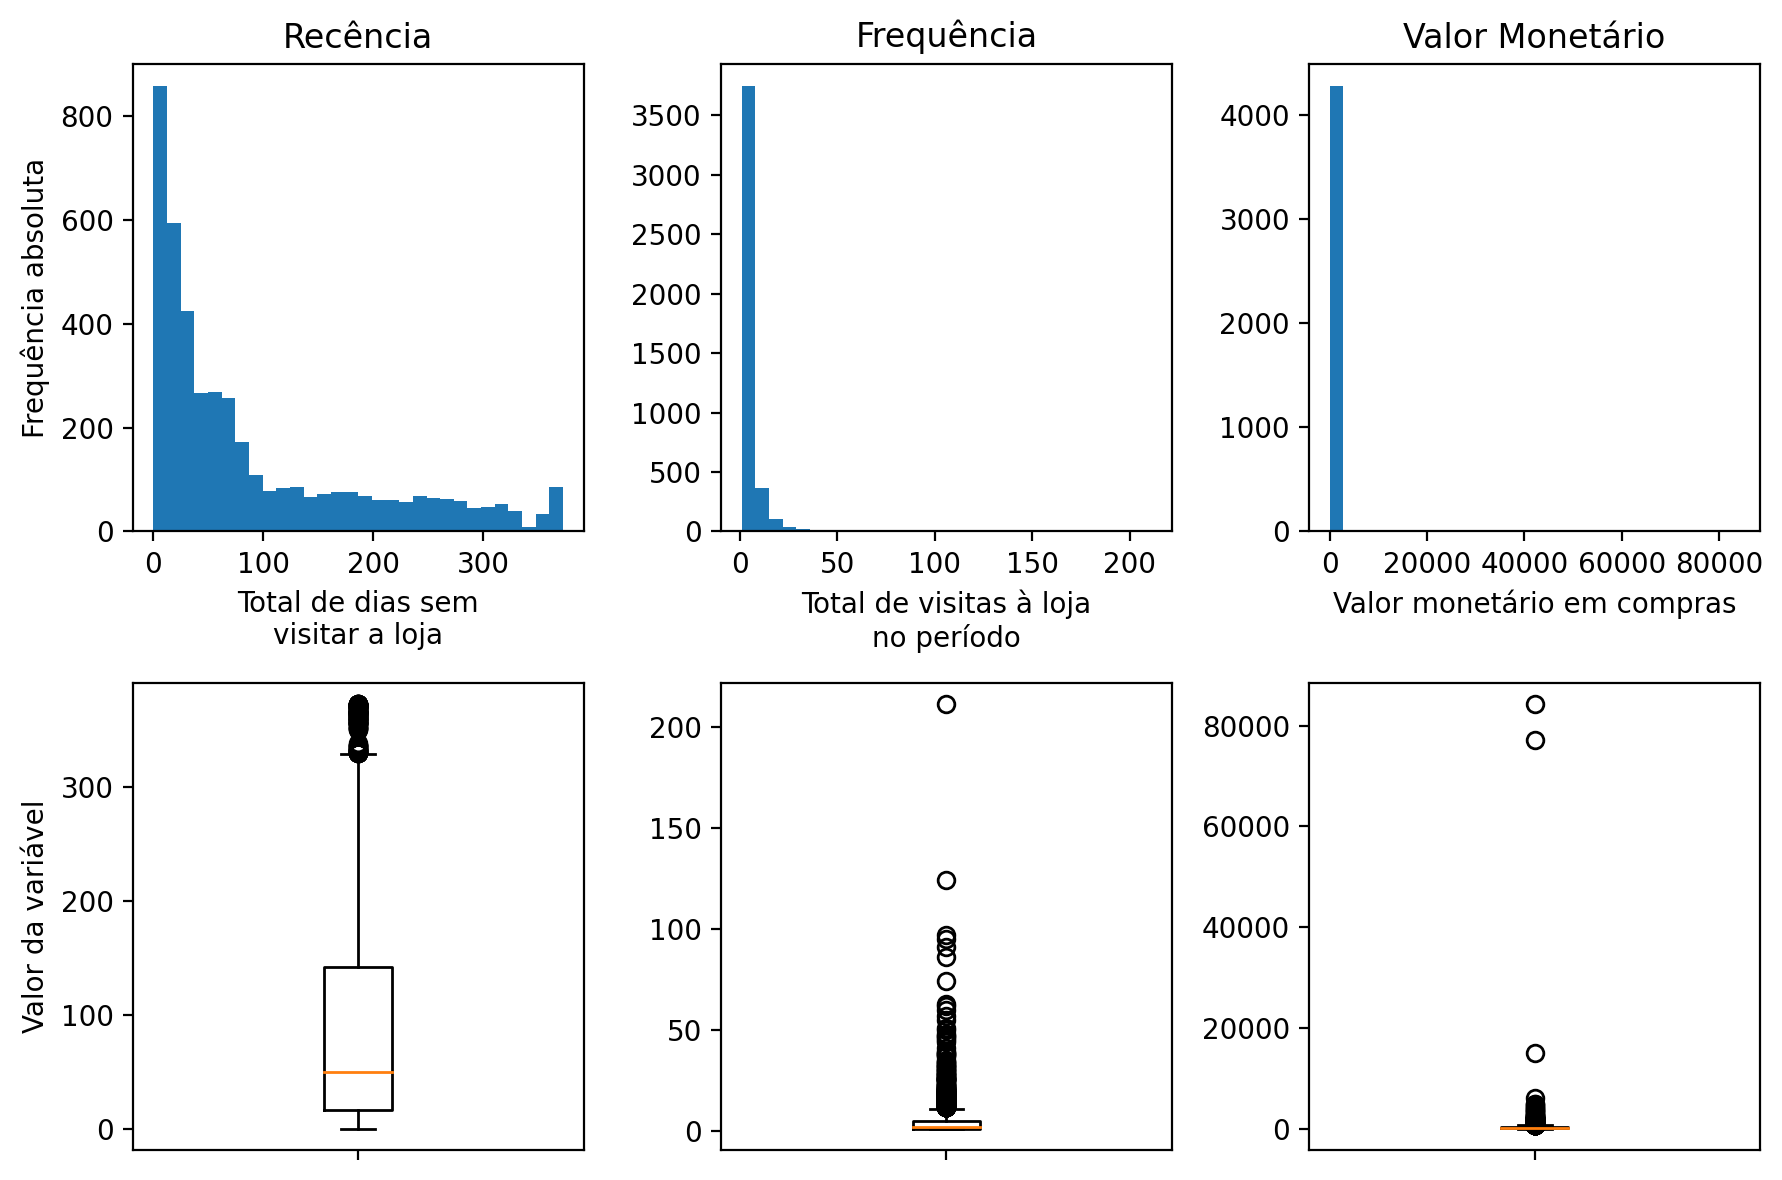

In [56]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(2,3,figsize = (9,6),dpi = 200)
ax[0,0].hist(rfm_data.recency,bins = 30)
ax[1,0].boxplot(rfm_data.recency)
ax[0,1].hist(rfm_data.frequency,bins = 30)
ax[1,1].boxplot(rfm_data.frequency)
ax[0,2].hist(rfm_data.monetary,bins = 30)
ax[1,2].boxplot(rfm_data.monetary)
ax[0,0].set_title("Recência")
ax[0,1].set_title("Frequência")
ax[0,2].set_title("Valor Monetário")
ax[0,0].set_ylabel('Frequência absoluta')
ax[0,0].set_xlabel('Total de dias sem\nvisitar a loja')
ax[0,1].set_xlabel('Total de visitas à loja\nno período')
ax[0,2].set_xlabel('Valor monetário em compras')
ax[1,0].set_ylabel('Valor da variável')
ax[1,0].set_xticklabels('')
ax[1,1].set_xticklabels('')
ax[1,2].set_xticklabels('')
plt.tight_layout()

## Segmentação de grupos de clientes por quartis

Aqui é feita a segmentação da recência, da frequência e do valor monetário em quartis.

Para fazer isso, encontramos o quartil inferior, a mediana e o quartil superior das três variáveis (recency, frequency e monetary) e categorizamos as respectivas variáveis de acordo com seu valor em relação aos quartis obtidos.

Para frequency e monetary, quanto maios a classe, mais frequente e maior valor monetário terá o cliente. Para a recency, uma vez que temos uma variável do tipo "quanto menor, melhor", utilizamos os valores das classes invertidos.

In [57]:
import numpy as np

r_labels = range(4, 0, -1)  # Recency é melhor quanto menor for o número de dias
rfm_data['R'] = pd.qcut(rfm_data['recency'], q=4, labels=r_labels)

# f_bins = np.linspace(0, rfm_data['frequency'].max(), 5)
# f_bins[0] = -1  # Garante que o menor valor de frequency está incluído
# f_labels = range(1, 5)
# rfm_data['F'] = pd.cut(rfm_data['frequency'], bins=f_bins, labels=f_labels, include_lowest=True)

f_labels = range(1,5)
rfm_data['F'] = pd.qcut(rfm_data['monetary'], q=4, labels=m_labels)

m_labels = range(1, 5)
rfm_data['M'] = pd.qcut(rfm_data['monetary'], q=4, labels=m_labels)

rfm_data['grupo_rfm'] = rfm_data['R'].astype(str) + rfm_data['F'].astype(str) + rfm_data['M'].astype(str)

Por fim, definimos o grupo RFM do cliente concatenando os valores de R, F e M de cada um

In [58]:
rfm_data

,customerid,recency,frequency,monetary,R,F,M,grupo_rfm
0,12346.0,325,1,77183.600,1,4,4,144
1,12347.0,1,7,584.910,4,4,4,444
2,12349.0,18,1,1757.550,3,4,4,344
3,12350.0,309,1,334.400,1,3,3,133
4,12352.0,35,8,281.375,3,2,2,322
...,...,...,...,...,...,...,...,...
4292,18280.0,277,1,180.600,1,2,2,122
4293,18281.0,180,1,80.820,1,1,1,111
4294,18282.0,7,2,89.025,4,1,1,411
4295,18283.0,3,16,113.500,4,1,1,411


## Agrupamento para análise de perfis de compra

Fazemos aqui o agrupamento dos dados por meio do grupo_rfm e agregamos as variáveis por suas medianas uma vez que a média das variáveis não seja uma boa opção de agregação visto que outliers influenciariam facilmente tal métrica

In [63]:
grupos = rfm_data[['recency','frequency','monetary','grupo_rfm']].groupby('grupo_rfm').agg(
    recency = ('recency','median'),
    frequency = ('frequency','median'),
    monetary = ('monetary','median'),
    occorencias = ('monetary','count')
)
grupos

,recency,frequency,monetary,occorencias
grupo_rfm,,,,
111,239.5,1.0,114.3000,374
122,252.0,1.0,215.4700,255
133,241.0,1.0,328.0650,224
144,238.0,1.0,560.6700,215
211,78.5,2.0,121.1050,250
222,74.0,2.0,222.0300,234
233,77.0,2.0,337.7925,262
244,77.0,2.0,578.1800,311
311,29.0,2.0,132.8800,231


Foi gerada também uma coluna de ocorrência indicando quantos clientes se encaixam dentro de cada grupo.

## Heatmap para análise RFM

Para que as cores do Heatmap não sejam imnfluenciadas pela larga escala das variáveis (principalmente a monerary), o heatmap teve suas cores baseadas no valo normalizado de cada uma das variáveis.

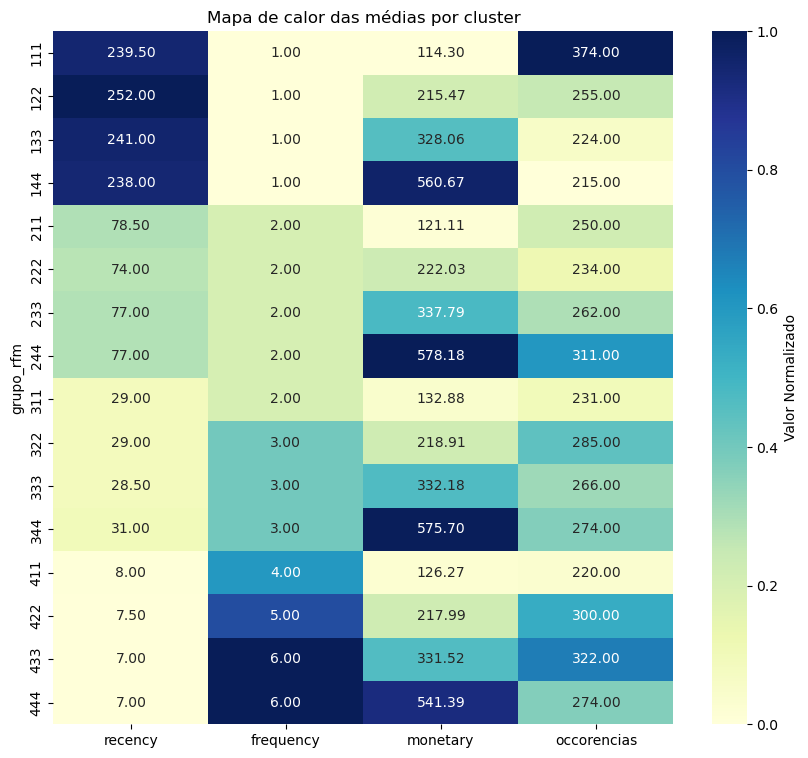

In [64]:
import seaborn as sns
normalized = (grupos - grupos.min()) / (grupos.max() - grupos.min())
plt.figure(figsize=(10, 9))
sns.heatmap(normalized, annot=grupos, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Valor Normalizado'})
plt.title('Mapa de calor das médias por cluster')
plt.show()